In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
data = pd.read_csv("datasets_2607_4342_indian_liver_patient_labelled.csv")
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [4]:
df = pd.DataFrame(data)

In [5]:
for col in df.columns:
    df[col] = df[col].fillna(0)

## Linear Regression

In [6]:
headers = list(df.columns)
headers.remove('Dataset')
headers.remove('Gender')
headers

['Age',
 'Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'Alamine_Aminotransferase',
 'Aspartate_Aminotransferase',
 'Total_Protiens',
 'Albumin',
 'Albumin_and_Globulin_Ratio']

In [7]:
X = df[headers]
Y = df['Dataset']

In [8]:
linregmodel = linear_model.LinearRegression()
linregmodel.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
print("Intercept is %f"%(linregmodel.intercept_))

Intercept is 1.652889


In [10]:
print("Coefficients are", linregmodel.coef_)

Coefficients are [-3.28673469e-03 -1.42320238e-04 -2.31205512e-02 -1.88914415e-04
 -3.91797975e-04  6.15626086e-05 -7.67359635e-02  1.44207956e-01
 -6.41924638e-02]


In [11]:
Y_pred = linregmodel.predict(X)

In [12]:
print("R2 score is", linregmodel.score(X,Y))

R2 score is 0.11808333306997776


## Logistic Regression

In [13]:
df['intercept'] = linregmodel.intercept_

In [14]:
df['Dataset'] = df['Dataset'].replace([1], 0)
df['Dataset'] = df['Dataset'].replace([2], 1)

In [15]:
logregmodel = sm.Logit(Y, X)

In [16]:
result = logregmodel.fit()

Optimization terminated successfully.
         Current function value: 0.498480
         Iterations 8


In [17]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Dataset   No. Observations:                  583
Model:                          Logit   Df Residuals:                      574
Method:                           MLE   Df Model:                            8
Date:                Thu, 04 Jun 2020   Pseudo R-squ.:                  0.1677
Time:                        21:42:23   Log-Likelihood:                -290.61
converged:                       True   LL-Null:                       -349.18
Covariance Type:            nonrobust   LLR p-value:                 1.291e-21
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Age                           -0.0119      0.006     -2.047      0.041      -0.023      -0.001
Total_Bilirubin               -0.0027      0.068     -0.040      0.968      -0.135       0.130
Direct_Bilirubin              -0.4754      0.218     -2.181      0.029      -0.903      -0.048
Alkaline_Phosphotase          -0.0009      0.001     -1.256      0.209      -0.002       0.001
Alamine_Aminotransferase      -0.0099      0.005     -2.075      0.038      -0.019      -0.001
Aspartate_Aminotransferase    -0.0027      0.003     -0.890      0.374      -0.009       0.003
Total_Protiens                -0.0932      0.170     -0.548      0.584      -0.426       0.240
Albumin                        0.3428      0.383      0.895      0.371      -0.408       1.094
Albumin_and_Globulin_Ratio     0.3074      0.508      0.606      0.545      -0.688       1.302
==============================================================================================
"""

In [18]:
print("Confidence intervals are", result.conf_int())

Confidence intervals are                                    0         1
Age                        -0.023199 -0.000502
Total_Bilirubin            -0.135368  0.129891
Direct_Bilirubin           -0.902515 -0.048202
Alkaline_Phosphotase       -0.002334  0.000511
Alamine_Aminotransferase   -0.019200 -0.000549
Aspartate_Aminotransferase -0.008661  0.003253
Total_Protiens             -0.426307  0.239933
Albumin                    -0.407972  1.093618
Albumin_and_Globulin_Ratio -0.687560  1.302403


In [19]:
Y_pred = logregmodel.predict(X.T)
cnf_matrix = confusion_matrix(Y, Y_pred[:,0:1])
cnf_matrix

array([[  0, 416],
       [  0, 167]])

Text(0.5, 257.44, 'Predicted label')

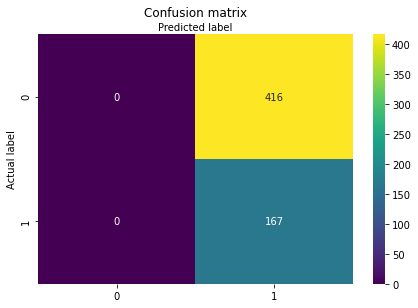

In [20]:
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [21]:
# everything seems to be labelled 1?

In [23]:
print("Accuracy is thus", 167/416)

Accuracy is thus 0.4014423076923077
